In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

### Экспоненциальное распределение:
#### Плотность вероятности:
$$f_X(x) =
\begin{cases}
\lambda e^{-\lambda x}, & \text{если $x\geqslant 0$,} \\
0, & \text{если $x < 0$.}
\end{cases}
$$
#### Дисперсия:
$${D}[X]= 
\frac{1}{\lambda^{2}}
$$
#### Математическое ожидание:
$${E}[X] = 
\frac{1}{\lambda}
$$

In [25]:
_lambda = 3
scale = 1 / _lambda

sample = np.array([sts.expon.rvs(scale=scale) for _ in range(1000)])
sample[:10]

array([0.14965397, 0.38721715, 0.14547371, 0.27819393, 0.19741964,
       0.86964929, 0.31276037, 0.30497926, 0.02602047, 0.29467802])

In [26]:
x = np.linspace(0, 3, 100)
pdf = sts.expon.pdf(x, scale=scale)

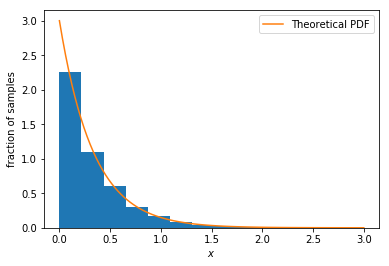

In [27]:
plt.hist(sample, density=True)
plt.plot(x, pdf, label='Theoretical PDF')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

plt.legend(loc='upper right')

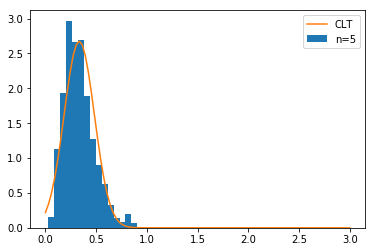

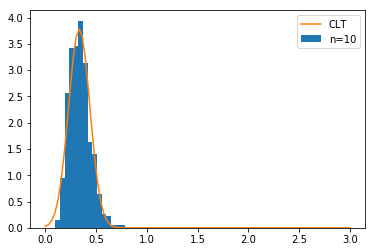

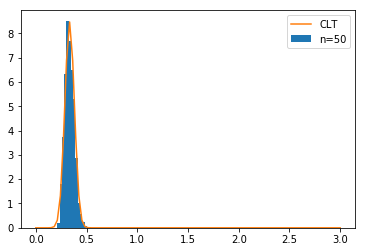

In [29]:
sample_sizes = [5, 10, 50]

for n in sample_sizes:
    mu = 1 / _lambda
    sigma = ((1 / _lambda)**2 / n)**0.5
    
    means = []
    for _ in range(1000):
        sample = np.array([sts.expon.rvs(scale=scale) for _ in range(n)])
        mean = np.mean(sample)
        means.append(mean)
    
    plt.hist(means, bins=15, density=True, label=f'n={n}')
    
    clt_pdf = sts.norm.pdf(x, mu, sigma)
    plt.plot(x, clt_pdf, label='CLT')
    
    plt.legend(loc='upper right')
    plt.show()

Видно, что при увеличении $n$, распределение выборочных средних по выборкам размера $n$ всё более походит на нормальное, предсказанное ЦПТ.